# Proyecto 03 - Sistemas de Recomendación

## Dataset: STEAM

**Recuerda descargar el dataset de [aquí](https://github.com/kang205/SASRec). Son dos archivos, uno de calificaciones y otro de información sobre los juegos.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset. Sin embargo, **deberás** modificarlas para hacer un mejor manejo de datos. Algunas cosas a las que deberás prestar atención (tal vez no a todas):
1. Tipos de datos: elige tipos de datos apropiados para cada columna.
2. Descartar columnas poco informativas.
3. Guardar en memoria datasets preprocesados para no tener que repetir código que tarde en correr.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿cuáles son los juegos más populares?¿Y los menos populares?

### Filtro Colaborativo

Deberás implementar un sistema de recomendación colaborativo para este dataset. Ten en cuenta:

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.

Puedes implementar un filtro colaborativo a partir de la similitud coseno o índice de Jaccard. ¿Puedes utilizar los métodos de la librería Surprise? Si no es así, busca implementaciones (por ejemplo, nuevas librerías) que sean apropiadas.

Para comenzar a trabajar, puedes asumir que cada entrada es un enlace entre una persona usuaria y un item, **independientemente** de si la crítica es buena o mala. 

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo harías para ponerle un valor a la calificación?
1. ¿Cómo harías para agregar contenido? Por ejemplo, cuentas con el género, precio, fecha de lanzamiento y más información de los juegos.
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

In [1]:
# Importamos las librerías que vamos a necesitar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
# Le doy formato a los gráficos
sns.set_style("darkgrid")
plt.rc('font', size=10)
plt.rc('axes', titlesize=16)
plt.rc('figure', titlesize=16)
plt.rc('axes', labelsize=14) 
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 

In [3]:
#Seteamos para que no utilice notacion cientifica
pd.options.display.float_format = '{:.4f}'.format
#Seteo para que el máximo de columnas que muestra al levantar una base sean 500
pd.set_option('display.max_columns',500)
#Estos códigos hacen que la visualización de la consola abarque toda la pantalla (sin los recortes a los costados). Tambien hacen que al mostrar dataframes podamos ver todas las columnas que tiene.
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [9]:
import gzip
import pandas as pd

def parse(path):
    g = gzip.open(path, 'r')
    for l in g:
        yield eval(l)

**Reviews**

In [4]:
from tqdm.notebook import tqdm

In [6]:
contador = 0
data_reviews = []
# Vamos a guardar una de cada 10 reviews para no llenar la memoria RAM. Si pones n = 3, 
# abrira uno de cada tres, y asi.
n = 10
for l in tqdm(parse('steam_reviews.json.gz')):
    if contador%n == 0:
        data_reviews.append(l)
    else:
        pass
    contador += 1


0it [00:00, ?it/s]

In [7]:
data_reviews = pd.DataFrame(data_reviews)

In [8]:
data_reviews.head(20)

,username,hours,products,product_id,page_order,date,text,early_access,page,user_id,compensation,found_funny
0,Chaos Syren,0.1000,41.0000,725280,0,2017-12-17,This would not be acceptable as an entertainme...,False,1,NaN,NaN,NaN
1,Ariman1,13.2000,1386.0000,328100,2,2017-08-02,Addictive RPG ! Works fine on linux though it ...,False,1,NaN,NaN,NaN
2,freakfantom,0.1000,1706.0000,725280,5,2017-11-12,Прикольная стрелялка. Взял дешево на распродаже.,False,1,NaN,NaN,NaN
3,The_Cpt_FROGGY,7.8000,2217.0000,631920,0,2017-12-11,Somewhere on Zibylon:\n~~~~~~~~~~~~~~~~~~\nZib...,False,1,76561198003030375,Product received for free,NaN
4,the_maker988,8.2000,18.0000,35140,7,2018-01-02,"This game was way to linear for me, and compar...",False,1,76561198353396844,NaN,NaN
5,Szudof,0.2000,155.0000,288690,0,2016-08-31,"<23:32:55> ""Pit"": Hello, my name is dominik di...",False,1,NaN,Product received for free,3.0000
6,Vonder,2.7000,264.0000,35600,3,2017-04-15,I like the art style and the idea but what a b...,False,1,76561198113497324,NaN,NaN
7,LucaFox,4.0000,136.0000,620900,3,2017-09-11,"Very, very good game. I love dungeon crawlers,...",False,1,76561198146674484,NaN,1.0000
8,rampage1209,34.8000,3.0000,1840,4,2018-01-04,WAY PAST COOL,False,1,76561198080474371,NaN,NaN
9,Devil Azite,0.1000,548.0000,671270,5,2017-07-09,Putting a hat on your head has disasterous rep...,False,1,NaN,Product received for free,1.0000


In [5]:
if False:
    data_reviews.to_csv('data_reviews.csv')
else:
    data_reviews = pd.read_csv('data_reviews.csv')

In [6]:
data_reviews.isna().sum()

Unnamed: 0           0
username            18
hours             2637
products          1566
product_id           0
page_order           0
date                 0
text              1839
early_access         0
page                 0
user_id         461967
compensation    764719
found_funny     659143
dtype: int64

**Games**

In [10]:
data_games = []
for l in parse('steam_games.json.gz'):
    data_games.append(l)
data_games = pd.DataFrame(data_games)

In [11]:
data_games.head()

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.4900,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.9900,False,761140,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",0.8300,http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.9900,False,767400,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",1.7900,http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.9900,False,773570,NaN,NaN,NaN


In [12]:
data_games[data_games.id == '35140']

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
31617,"Warner Bros. Interactive Entertainment, Feral ...","[Action, Adventure]",Batman: Arkham Asylum Game of the Year Edition,Batman: Arkham Asylum Game of the Year Edition,http://store.steampowered.com/app/35140/Batman...,2010-03-26,"[Action, Batman, Stealth, Adventure, Third Per...",NaN,http://steamcommunity.com/app/35140/reviews/?b...,"[Single-player, Steam Achievements, Steam Trad...",19.9900,False,35140,"Rocksteady Studios,Feral Interactive (Mac)",Overwhelmingly Positive,91


### Vamos a reducir las columnas de *'data_reviews'*

In [13]:
data_reviews.columns

Index(['Unnamed: 0', 'username', 'hours', 'products', 'product_id',
       'page_order', 'date', 'text', 'early_access', 'page', 'user_id',
       'compensation', 'found_funny'],
      dtype='object')

In [14]:
df_reviews = data_reviews[['username', 'product_id', 'text', 'found_funny', 'hours']]
df_reviews.head()

,username,product_id,text,found_funny,hours
0,Chaos Syren,725280,This would not be acceptable as an entertainme...,NaN,0.1000
1,Ariman1,328100,Addictive RPG ! Works fine on linux though it ...,NaN,13.2000
2,freakfantom,725280,Прикольная стрелялка. Взял дешево на распродаже.,NaN,0.1000
3,The_Cpt_FROGGY,631920,Somewhere on Zibylon:\n~~~~~~~~~~~~~~~~~~\nZib...,NaN,7.8000
4,the_maker988,35140,"This game was way to linear for me, and compar...",NaN,8.2000


### Traducción de texto

In [15]:
from googletrans import Translator

### Detectar idioma del texto

In [33]:
pip install langdetect

  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993221 sha256=e45341e78f1a54a8b2e5bef140588731b514a7066711ce19b5f7b0224682b7e6
  Stored in directory: c:\users\elmai\appdata\local\pip\cache\wheels\d1\c1\d9\7e068de779d863bc8f8fc9467d85e25cfe47fa5051fff1a1bb
Successfully built langdetect
Note: you may need to restart the kernel to use updated packages.


In [16]:
from langdetect import detect

language = []
for text in tqdm(df_reviews['text']):
    try:                                                          
       lang = detect(text)                                     
    except:                                                       
       lang = 'no'

    language.append(lang)
        
df_reviews['language'] = language
df_reviews

  0%|          | 0/779307 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [23]:
df_reviews.loc[(df_reviews.language == 'no')] = np.NaN
df_reviews.language.unique()

array(['English', 'Russian', 'Somali', 'Polish', 'German', 'Italian',
       'French', 'Catalan', 'Swahili', 'Turkish', nan, 'Romanian',
       'Tagalog', 'Spanish', 'Afrikaans', 'Vietnamese', 'Dutch',
       'Albanian', 'Welsh', 'Portuguese', 'Indonesian', 'Latvian',
       'Japanese', 'Estonian', 'Swedish', 'Lithuanian', 'Korean', 'Thai',
       'Czech', 'Croatian', 'Danish', 'Slovenian', 'Hungarian', 'Slovak',
       'Greek', 'Arabic', 'Bulgarian', 'Finnish', 'Hebrew', 'Ukrainian',
       'Persian', 'Macedonian', 'Bengali', 'Tamil', 'Kannada'],
      dtype=object)

In [17]:
if False:
    df_reviews.to_csv('df_reviews.csv')
else:
    df_reviews = pd.read_csv('df_reviews.csv')

In [18]:
code = pd.read_csv('lang_code3.csv')
code_dict = code.set_index('code').to_dict()['language_name']
df_reviews['language'] = df_reviews['language'].map(code_dict)

In [19]:
idiomas = df_reviews.groupby('language').count()['username'].sort_values(ascending=False)

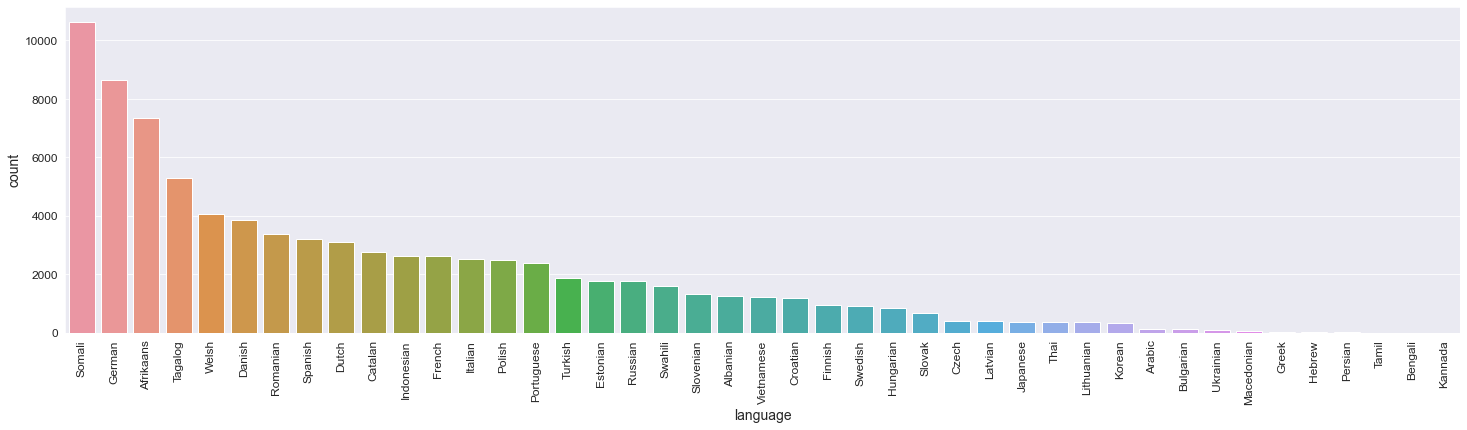

In [20]:
plt.figure(figsize=(25,6))
sns.countplot(data=df_reviews, x='language', order=idiomas.index[1:])
plt.xticks(rotation=90)
plt.show()

In [21]:
idiomas.index

Index(['English', 'Somali', 'German', 'Afrikaans', 'Tagalog', 'Welsh',
       'Danish', 'Romanian', 'Spanish', 'Dutch', 'Catalan', 'Indonesian',
       'French', 'Italian', 'Polish', 'Portuguese', 'Turkish', 'Estonian',
       'Russian', 'Swahili', 'Slovenian', 'Albanian', 'Vietnamese', 'Croatian',
       'Finnish', 'Swedish', 'Hungarian', 'Slovak', 'Czech', 'Latvian',
       'Japanese', 'Thai', 'Lithuanian', 'Korean', 'Arabic', 'Bulgarian',
       'Ukrainian', 'Macedonian', 'Greek', 'Hebrew', 'Persian', 'Tamil',
       'Bengali', 'Kannada'],
      dtype='object', name='language')

In [22]:
df_reviews[df_reviews.language == 'Somali'].head(50)

,Unnamed: 0,username,product_id,text,found_funny,hours,language
31,31,JessetheGengar,302390.0000,baaaddddddd,NaN,0.4000,Somali
247,247,69:The Best Position,271590.0000,good,NaN,176.3000,Somali
316,316,Smokeing Fags And Selling Bags,271590.0000,good♥♥♥♥♥♥very good,NaN,2.6000,Somali
354,354,Santiago ♥D,308040.0000,bad,1.0000,1.3000,Somali
445,445,brokensteelcache,224900.0000,too good to play.,1.0000,1.3000,Somali
601,601,𝖊𝖃𝖔 | Psycocat,308040.0000,good game :),NaN,3.2000,Somali
617,617,Vukishaa,308040.0000,good,NaN,3.3000,Somali
698,698,Dicather,441050.0000,♥♥♥♥ YEAH IT CAN INTO SPACE! 87/10,NaN,1.6000,Somali
718,718,MyAcidicPapaya,341720.0000,good,NaN,0.8000,Somali
741,741,✪ B1ACKOUT,271590.0000,good game,NaN,12.1000,Somali
